In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split

В данном датасете нужно определить выдавать ли кредитную карточку человеку или нет на основе некоторых параметров. Делать это будем при помощи дерева решений.

In [2]:
data=pd.read_csv('Credit_card.csv')
ans=pd.read_csv('Credit_card_label.csv')
data=pd.merge(data,ans,on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [3]:

data = data.drop(['Type_Occupation', 'Mobile_phone'], axis=1)
data = data.dropna(subset=['GENDER', 'Annual_income', 'Birthday_count'])
for column in data:
    if type(data[column][0]) is str:
        data[column] = pd.factorize(data[column])[0]
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,0,0,0,0,180000.0,0,0,0,0,-18772.0,365243,0,0,0,2,1
1,5009744,1,0,1,0,315000.0,1,0,0,0,-13557.0,-586,1,1,0,2,1
4,5009752,1,0,1,0,315000.0,1,0,0,0,-13557.0,-586,1,1,0,2,1
6,5009754,1,0,1,0,315000.0,1,0,0,0,-13557.0,-586,1,1,0,2,1
7,5009894,1,1,1,0,180000.0,0,1,0,0,-22134.0,365243,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,0,0,1,1,360000.0,3,1,0,0,-11294.0,-3536,0,1,0,3,0
1544,5023655,1,1,1,0,225000.0,1,3,1,0,-10229.0,-1209,0,0,0,1,0
1545,5115992,0,0,0,2,180000.0,2,0,0,0,-13174.0,-2477,0,0,0,4,0
1546,5118219,0,0,1,0,270000.0,2,1,2,0,-15292.0,-645,1,1,0,2,0


Обработка данных

In [4]:
data=pd.read_csv('Credit_card.csv')
ans=pd.read_csv('Credit_card_label.csv')
data=pd.merge(data,ans,on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


Удалим пустые строки и изменим категориальные признаки на числовые.

In [5]:
data = data.drop(['Type_Occupation','Mobile_phone'], axis=1)
data = data.dropna(subset=['GENDER','Annual_income','Birthday_count'])
for column in data:
    if type(data[column][0]) is str:
        data[column] = pd.factorize(data[column])[0]
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,0,0,0,0,180000.0,0,0,0,0,-18772.0,365243,0,0,0,2,1
1,5009744,1,0,1,0,315000.0,1,0,0,0,-13557.0,-586,1,1,0,2,1
4,5009752,1,0,1,0,315000.0,1,0,0,0,-13557.0,-586,1,1,0,2,1
6,5009754,1,0,1,0,315000.0,1,0,0,0,-13557.0,-586,1,1,0,2,1
7,5009894,1,1,1,0,180000.0,0,1,0,0,-22134.0,365243,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,0,0,1,1,360000.0,3,1,0,0,-11294.0,-3536,0,1,0,3,0
1544,5023655,1,1,1,0,225000.0,1,3,1,0,-10229.0,-1209,0,0,0,1,0
1545,5115992,0,0,0,2,180000.0,2,0,0,0,-13174.0,-2477,0,0,0,4,0
1546,5118219,0,0,1,0,270000.0,2,1,2,0,-15292.0,-645,1,1,0,2,0


Проверка на мультиколлениарность

<Axes: >

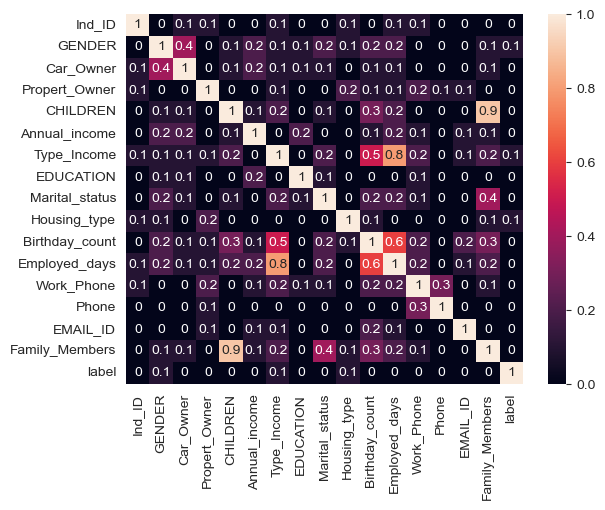

In [6]:
sns.heatmap(
    round(
        abs(data.corr()),
        1,
    ),
    annot=True,
) 


In [7]:
data=data.drop(['Family_Members','Employed_days','Birthday_count','Car_Owner'],axis=1)

In [8]:
train_input, test_input, train_output, test_output = train_test_split(
    data.drop('label', axis=1),
    data['label'],
    test_size=0.2
)

Постройка модели дерева решений.

Text(0.5, 1.0, 'Матрица сходства')

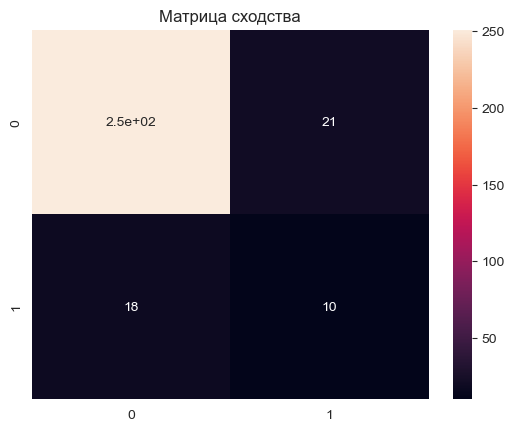

In [9]:
model = tree.DecisionTreeClassifier(max_depth=15, max_features="log2")
model.fit(train_input, train_output)
predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)
sns.heatmap(
    confusion_matrix,
    annot=True
)
plt.title('Матрица сходства') 


Вывод дерева решений

Text(0.5, 1.0, 'Дерево решений')

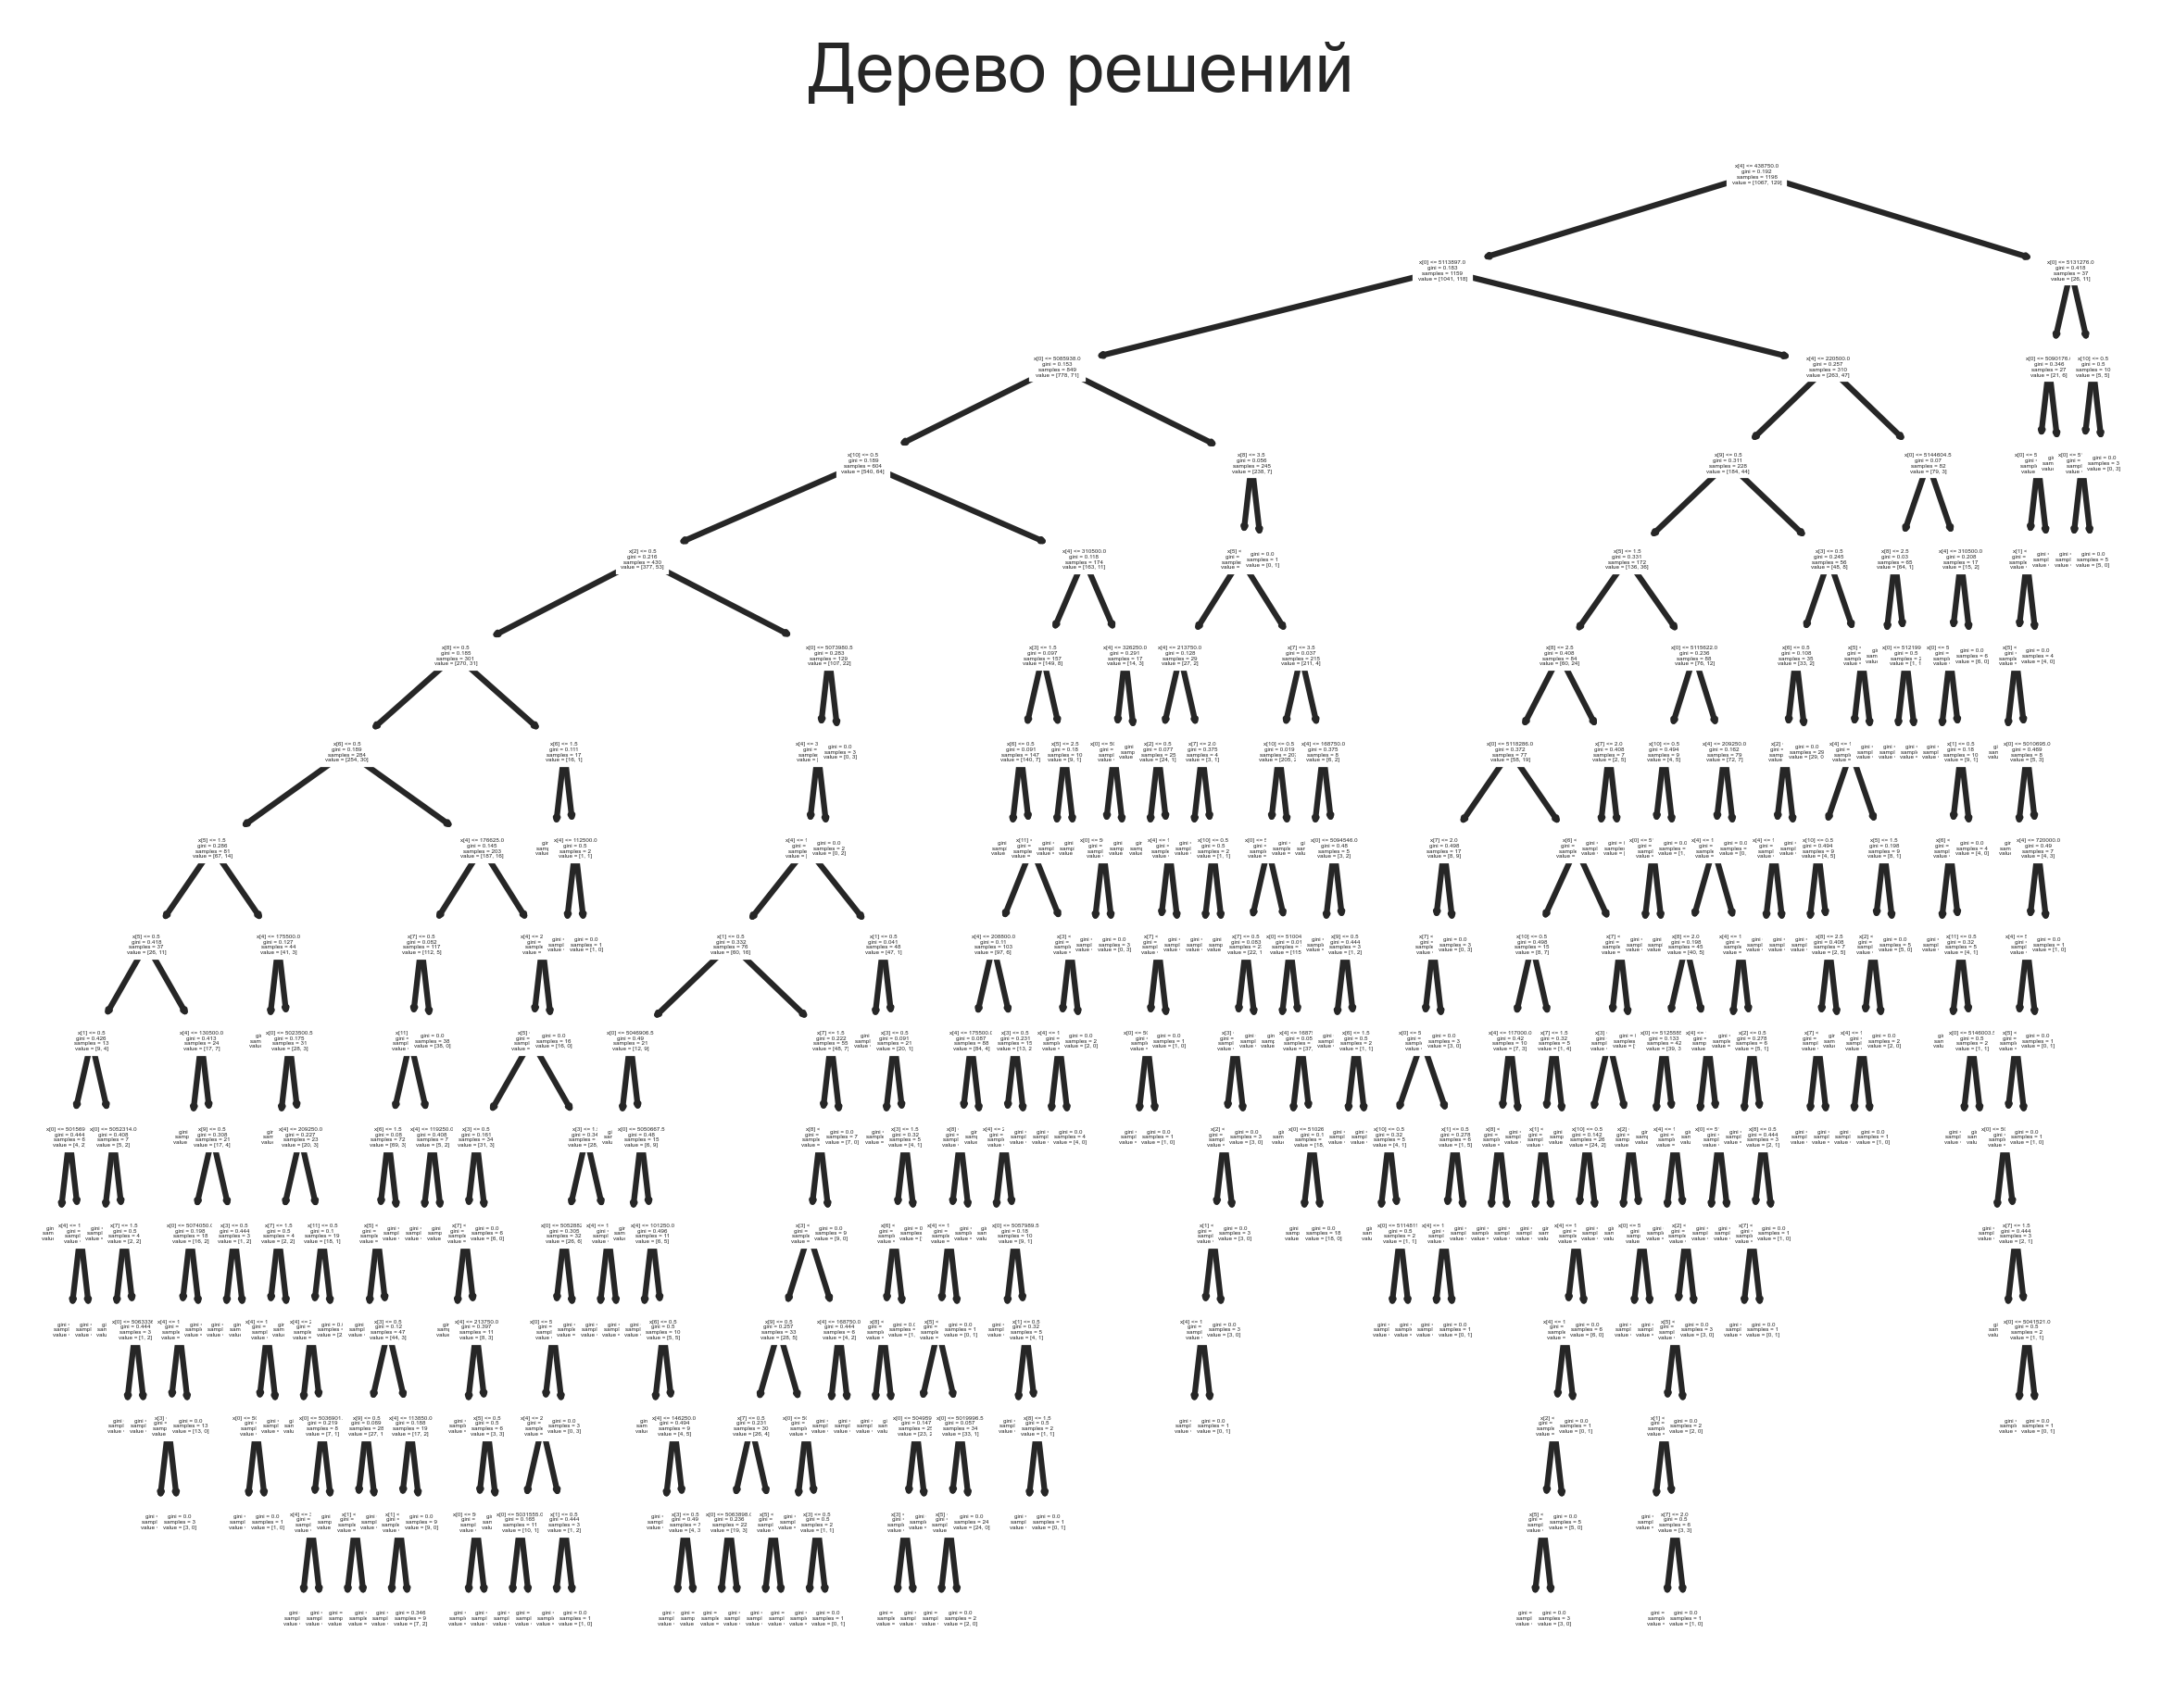

In [10]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")

Из данного датасета можно построить модель, которая будет определять выдать ли человеку кредитную карточку на основе некоторых параметров. Это поможет лучше определять не благонадежных клиентов и увеличит прибыль банковских учреждений.